In [1]:
%load_ext autoreload
%autoreload 1
%aimport util_csv
%aimport util_image
%aimport runner

Using TensorFlow backend.


## Imports

In [2]:
from runner import *
from util_image import *
from util_csv import NewFileName
from runner import DataBase as DB
from Timer import Timer 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_path =  'data/org'

data = Timer.run(lambda :DB.CreateFromFile('data/org'))
data_path = data.params[BaseDir]
data.describe()

---------------------------------------------------------------
elapsed time: 10.244 secs
---------------------------------------------------------------


,steer,gas,brake,speed
count,8036.000000,8036.000000,8036.000000,8036.000000
mean,0.004070,0.869660,0.001970,28.169839
std,0.128840,0.301326,0.036565,6.149327
min,-0.942695,0.000000,0.000000,0.502490
25%,0.000000,0.985533,0.000000,30.183093
50%,0.000000,0.985533,0.000000,30.186400
75%,0.000000,0.985533,0.000000,30.186640
max,1.000000,0.985533,1.000000,30.709360


### Data Input

Count :          Ranges
 4361 : [ -0.00010, -0.00003 ]
  237 : [  0.17649,  0.17656 ]
  179 : [ -0.14528, -0.14522 ]


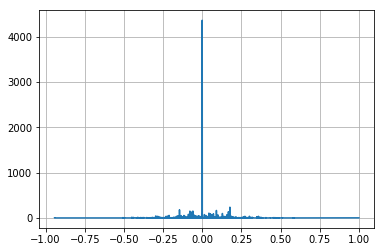

,steer,gas,brake,speed
count,8036.000000,8036.000000,8036.000000,8036.000000
mean,0.004070,0.869660,0.001970,28.169839
std,0.128840,0.301326,0.036565,6.149327
min,-0.942695,0.000000,0.000000,0.502490
25%,0.000000,0.985533,0.000000,30.183093
50%,0.000000,0.985533,0.000000,30.186400
75%,0.000000,0.985533,0.000000,30.186640
max,1.000000,0.985533,1.000000,30.709360


In [4]:

def show_data_distribution(datas, bins=30000):
    dhist, dbins = np.histogram(datas, bins=bins)
    sortInd = dhist.argsort()

    print("{:5s} :          Ranges".format("Count"))
    for i in range(3): 
        ind = sortInd[-(i+1)]
        cnt = dhist[ind]
        print("{:5d} : [ {: 5.5f}, {: 5.5f} ]".format(cnt, dbins[ind-1], dbins[ind]))

    ax = plt.plot(dbins[:-1],dhist)
    plt.grid('on')
    plt.show()

show_data_distribution(data.steer)
data.describe()


## Pre-Process

## Train

In [5]:
path=NewFileName('models/model.h5')
tr = Timer.run(lambda:NVidia(data))
res = Timer.run(lambda: tr.train(epoch=30, verbose=1, path=path))

print("Model Saved At: " + path)
# res = tr.train(epoch=20, verbose=1, path=NewFileName('models/model.h5'))

/home/carnd/p3/runner.py:240: UserWarning: Update your `Cropping2D` call to the Keras 2 API: `Cropping2D(input_shape=(160, 320,..., cropping=((70, 25),..., data_format="channels_last")`
  input_shape=(160, 320, 3)))
/home/carnd/p3/runner.py:249: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (8, 8), strides=(4, 4), padding="same")`
  model.add(Convolution2D(16, 8, 8, subsample=(4, 4), border_mode="same"))
/home/carnd/p3/runner.py:253: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), strides=(2, 2), padding="same")`
  model.add(Convolution2D(32, 5, 5, subsample=(2, 2), border_mode="same"))
/home/carnd/p3/runner.py:257: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), strides=(2, 2), padding="same")`
  model.add(Convolution2D(64, 5, 5, subsample=(2, 2), border_mode="same"))


---------------------------------------------------------------
elapsed time: 1.816 secs
---------------------------------------------------------------


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 6428 samples, validate on 1608 samples
Epoch 1/30
6428/6428 [==============================] - 12s - loss: 0.0212 - acc: 0.5401 - val_loss: 0.0147 - val_acc: 0.5516

In [21]:
print(res.on_train_end())

None
